# 多层感知机

## 第一部分：多层感知机的基本概念

### 1.1 什么是多层感知机？

多层感知机（Multilayer Perceptron，MLP）是一种前馈神经网络，它是深度学习的基础构建块之一。

### 1.2 核心概念解释

#### 1.2.1 感知机（Perceptron）

**通俗解释**：感知机就像一个简单的决策器，它接收多个输入信息，经过加权处理后做出一个决定。

**举例说明**：假设你要决定是否去看电影，你会考虑：

- 天气好坏（权重：0.3）
- 有没有时间（权重：0.5）
- 电影评分（权重：0.4）

感知机会将这些因素加权求和，如果结果超过某个阈值，就决定去看电影。

#### 1.2.2 多层感知机

**通俗解释**：多层感知机就是把多个感知机组织成层次结构，让决策过程更加复杂和智能。

**举例说明**：

- 第一层：处理基础特征（如图像的边缘、颜色）
- 第二层：组合基础特征成更复杂的模式（如形状、纹理）
- 第三层：最终决策（如这是猫还是狗）

#### 1.2.3 隐藏层（Hidden Layer）

**定义**：位于输入层和输出层之间的层，负责提取和转换特征。

**比喻**：如果把神经网络比作工厂，隐藏层就是中间的加工车间，将原材料（输入）加工成半成品，最后在输出层组装成最终产品。

#### 1.2.4 激活函数（Activation Function）

**作用**：为神经网络引入非线性能力，让网络能够学习复杂的模式。

**比喻**：激活函数就像一个过滤器或开关，决定神经元是否要"激活"并传递信息到下一层。


## 第二部分：为什么需要多层感知机？

### 2.1 线性模型的局限性

之前我们学习的线性回归和 softmax 回归都属于线性模型，它们有一个重要假设：**特征与输出之间存在线性关系**。

#### 2.1.1 线性模型的限制

**单调性假设**：线性模型假设任何特征的增大都会单调地影响输出

- 权重为正：特征增大 → 输出增大
- 权重为负：特征增大 → 输出减小

#### 2.1.2 现实中的反例

**例子 1：体温与死亡率**

- 正常体温：$37°C$，死亡率最低
- 体温过低（$<37°C$）：体温越低，死亡率越高
- 体温过高（$>37°C$）：体温越高，死亡率越高

这种"U 型"关系无法用线性模型准确描述。

**例子 2：图像分类**
对于图像中某个位置的像素值：

- 线性模型假设：该像素亮度增加总是增加（或减少）某类别的概率
- 现实情况：像素的重要性取决于周围像素的上下文

**例子 3：收入与贷款偿还**

- 收入从 0 增加到 5 万：偿还概率大幅提升
- 收入从 100 万增加到 105 万：偿还概率提升很小

这种关系更像对数关系，而非线性关系。


## 第三部分：隐藏层的引入

### 3.1 解决方案：添加隐藏层

为了克服线性模型的限制，我们在网络中加入一个或多个**隐藏层**，使其能处理更复杂的函数关系。

### 3.2 多层感知机的架构

#### 3.2.1 基本结构

一个典型的单隐藏层 MLP 包含：

- **输入层**：接收原始特征（不进行计算）
- **隐藏层**：进行特征变换和组合
- **输出层**：产生最终预测结果

#### 3.2.2 数学表示

对于具有 h 个隐藏单元的单隐藏层 MLP：

**隐藏层计算**：
$$\mathbf{H} = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$$

**输出层计算**：
$$\mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}$$

其中：

- $\mathbf{X}$：输入数据矩阵 $(n \times d)$
- $\mathbf{W}^{(1)}$：第一层权重矩阵 $(d \times h)$
- $\mathbf{b}^{(1)}$：第一层偏置向量 $(h,)$
- $\mathbf{W}^{(2)}$：第二层权重矩阵 $(h \times \text{输出维度})$
- $\mathbf{b}^{(2)}$：第二层偏置向量
- $\sigma$：激活函数（关键！）

#### 3.2.3 为什么需要激活函数？

**没有激活函数的问题**：
如果去掉激活函数 $\sigma$，那么：
$$\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}$$

这仍然是一个线性模型！多层结构没有增加任何表达能力。

**激活函数的作用**：

- 引入非线性变换
- 让网络能够学习复杂的模式
- 每一层都能提取不同层次的特征


## 第四部分：常用激活函数详解

激活函数是多层感知机的关键组件，它们为网络引入非线性能力。让我们详细了解几个重要的激活函数。

### 4.1 ReLU 函数（修正线性单元）

#### 4.1.1 数学定义

$$\text{ReLU}(x) = \max(x, 0)$$

#### 4.1.2 特点解释

- **简单有效**：计算非常快速
- **稀疏激活**：输出中有很多 0 值，提供稀疏性
- **解决梯度消失**：正值区域梯度为 1，缓解梯度消失问题

#### 4.1.3 优缺点

**优点**：

- 计算简单，训练快速
- 缓解梯度消失问题
- 在实践中效果很好

**缺点**：

- "死亡 ReLU"问题：负值区域梯度为 0，可能导致神经元不再更新

### 4.2 Sigmoid 函数

#### 4.2.1 数学定义

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$

#### 4.2.2 特点解释

- **压缩函数**：将任意实数映射到(0,1)区间
- **平滑可导**：处处可导，适合梯度优化
- **类似概率**：输出可以解释为概率

#### 4.2.3 导数

$$\frac{d}{dx} \text{sigmoid}(x) = \text{sigmoid}(x)(1-\text{sigmoid}(x))$$

#### 4.2.4 缺点

- **梯度消失**：当|x|很大时，梯度接近 0
- **输出不以 0 为中心**：所有输出都是正数

### 4.3 Tanh 函数（双曲正切）

#### 4.3.1 数学定义

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$$

#### 4.3.2 特点解释

- **零中心**：输出范围(-1,1)，以 0 为中心
- **与 sigmoid 关系**：tanh(x) = 2sigmoid(2x) - 1

#### 4.3.3 导数

$$\frac{d}{dx} \text{tanh}(x) = 1 - \text{tanh}^2(x)$$


## 第五部分：从零开始实现多层感知机

In [22]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体和图形参数
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 显示中文
plt.rcParams["axes.unicode_minus"] = False  # 显示负号

print("PyTorch版本:", torch.__version__)
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size) # 加载Fashion-MNIST数据集

PyTorch版本: 2.7.1+cu128


In [ ]:
# 定义神经网络的输入层、输出层和隐藏层的神经元数量
num_inputs, num_outputs, num_hiddens = 784, 10, 256

# 初始化输入层到隐藏层的权重参数，使用随机数乘以0.01进行初始化，以避免梯度消失或爆炸
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
# 初始化隐藏层的偏置参数，初始值为0
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
# 初始化隐藏层到输出层的权重参数，同样使用随机数乘以0.01进行初始化
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
# 初始化输出层的偏置参数，初始值为0
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

# 将所有参数组织成一个列表，方便后续的优化处理
params = [W1, b1, W2, b2]

### 5.1 参数初始化详解

**参数设置说明**：

- `num_inputs = 784`：输入特征数量（$28 \times 28$ 像素的图片展平后）
- `num_outputs = 10`：输出类别数量（Fashion-MNIST 有 10 个服装类别）
- `num_hiddens = 256`：隐藏层神经元数量

**权重和偏置矩阵形状**：

- `W1`：第一层权重矩阵，形状为 $(784, 256)$
  - 连接输入层的 784 个特征到隐藏层的 256 个神经元
- `b1`：第一层偏置向量，形状为 $(256,)$
  - 为隐藏层的每个神经元提供偏置
- `W2`：第二层权重矩阵，形状为 $(256, 10)$
  - 连接隐藏层的 256 个神经元到输出层的 10 个类别
- `b2`：第二层偏置向量，形状为 $(10,)$
  - 为输出层的每个类别提供偏置

**初始化策略解释**：

- 权重使用小的随机值初始化（乘以 0.01）：避免梯度爆炸
- 偏置初始化为 0：标准做法，让网络从对称状态开始学习
- `requires_grad=True`：告诉 PyTorch 这些参数需要计算梯度

**为什么这样设计**：

- 隐藏层大小 256：在表达能力和计算效率之间取得平衡
- 小权重初始化：防止激活函数饱和，保证梯度正常传播


In [ ]:
def relu(X):
    """
    实现ReLU(Rectified Linear Unit)激活函数。

    ReLU函数是一种广泛应用于神经网络中的激活函数，它将输入的数值阈值化，
    使得输出为0（当输入小于等于0时）或输入本身（当输入大于0时）。

    参数:
    X (Tensor): 输入的张量。

    返回:
    Tensor: 应用ReLU激活函数后的张量。
    """
    # 创建一个与输入张量X形状相同的零张量，作为阈值比较的对象
    a = torch.zeros_like(X)
    # 比较输入张量X中的每个元素与零张量a对应的元素，
    # 选择较大的值作为输出张量的元素，从而实现ReLU激活函数的功能
    return torch.max(X, a)

### 5.2 ReLU 激活函数工作原理

**函数行为**：

```python
def relu(X):
    a = torch.zeros_like(X)  # 创建与X相同形状的零张量
    return torch.max(X, a)   # 返回X和0的逐元素最大值
```

**数学表达**：$$\text{ReLU}(x) = \max(x, 0)$$

**实际效果演示**：

- 输入 $[-2, -1, 0, 1, 2] \rightarrow$ 输出 $[0, 0, 0, 1, 2]$
- 负值变为 0，正值保持不变

**为什么选择 ReLU**：

1. **计算简单**：只需要比较和选择操作，速度快
2. **解决梯度消失**：正值区域梯度恒为 1，有利于深层网络训练
3. **稀疏性**：产生稀疏的激活，提高模型效率
4. **生物学启发**：模拟神经元的"阈值激活"特性

**ReLU 的作用**：

- 在隐藏层中引入非线性，让网络能学习复杂模式
- 每个隐藏层神经元的输出要么是 0（不激活），要么是正值（激活）
- 这种"开关"特性让网络能够选择性地激活不同的特征检测器


### 5.3 模型定义


In [ ]:
def net(X):
    """
    实现一个简单的两层全连接神经网络的前向传播过程。

    参数:
    X - 输入数据，形状为(batch_size, num_inputs)，其中batch_size是输入样本的数量，num_inputs是每个样本的特征数量。

    返回:
    返回经过两层全连接神经网络处理后的输出数据。
    """
    # 将输入数据X重塑为二维数组，以适应后续的矩阵运算。
    X = X.reshape((-1, num_inputs))

    # 使用ReLU激活函数计算隐藏层的输出。
    # 这里“@”代表矩阵乘法。
    H = relu(X @ W1 + b1)

    # 计算输出层的输出，没有使用激活函数，通常是回归任务的标志。
    return H @ W2 + b2

#### 5.3.1 多层感知机前向传播过程

**数据流分析**：

```python
def net(X):
    X = X.reshape((-1, num_inputs))  # 步骤1：数据预处理
    H = relu(X @ W1 + b1)           # 步骤2：隐藏层计算
    return H @ W2 + b2              # 步骤3：输出层计算
```

**详细步骤解释**：

**步骤 1：数据预处理**

- `X.reshape((-1, num_inputs))`：将输入重新整形
- 原始输入：$(batch\_size, 28, 28)$ 的图像
- 整形后：$(batch\_size, 784)$ 的扁平化特征向量
- `-1` 表示自动计算 batch_size 维度

**步骤 2：隐藏层计算**

- `X @ W1`：矩阵乘法 $(batch\_size, 784) \times (784, 256) \rightarrow (batch\_size, 256)$
- `+ b1`：加偏置，广播机制自动扩展 b1 的形状
- `relu(...)`：应用激活函数，引入非线性
- 结果 H：$(batch\_size, 256)$ 的隐藏层表示

**步骤 3：输出层计算**

- `H @ W2`：$(batch\_size, 256) \times (256, 10) \rightarrow (batch\_size, 10)$
- `+ b2`：加输出偏置
- 最终输出：每个样本对 10 个类别的"得分"（未归一化概率）

**网络的信息变换**：
$$\text{原始图像} \rightarrow \text{扁平化向量} \rightarrow \text{隐藏特征} \rightarrow \text{类别得分}$$
$$(28 \times 28) \rightarrow (784,) \rightarrow (256,) \rightarrow (10,)$$

**为什么这样设计**：

- 隐藏层学习图像的抽象特征表示
- 输出层将这些特征映射到具体类别
- ReLU 确保网络能学习复杂的非线性关系


### 5.4 损失函数

In [26]:
loss = nn.CrossEntropyLoss(reduction="none")

#### 5.4.1 交叉熵损失函数详解

**损失函数定义**：

```python
loss = nn.CrossEntropyLoss(reduction='none')
```

**为什么选择交叉熵损失**：

1. **适合多分类问题**：Fashion-MNIST 有 10 个类别
2. **包含 Softmax**：自动将网络输出转换为概率分布
3. **数值稳定**：PyTorch 内部使用 log-sum-exp 技巧避免数值溢出

**参数说明**：

- `reduction='none'`：返回每个样本的损失值，而不是平均值
- 这样可以在训练函数中灵活处理损失的聚合方式

**损失计算过程**：

1. **Softmax 变换**：将网络输出转换为概率

   - 输入：$[2.1, -1.3, 0.8, ...]$ (10 个类别得分)
   - 输出：$[0.7, 0.05, 0.2, ...]$ (10 个概率，和为 1)

2. **交叉熵计算**：衡量预测概率与真实标签的差距
   - 如果真实标签是类别 2，只关心该类别的预测概率
   - 损失 = $-\log(\text{预测正确类别的概率})$
3. **损失特性**：
   - 预测完全正确时损失为 0
   - 预测完全错误时损失趋向无穷大
   - 鼓励模型对正确类别给出高概率

**实际意义**：

- 损失值越小，模型预测越准确
- 训练目标就是最小化这个损失函数
- 通过反向传播更新参数，逐渐提高预测准确性


### 5.5 训练


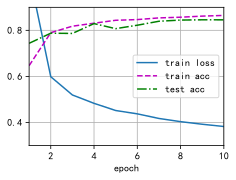

In [27]:
# 设置训练的轮数和学习率
num_epochs, lr = 10, 0.1

# 初始化优化器，使用随机梯度下降算法
updater = torch.optim.SGD(params, lr=lr)

# 使用定义的网络模型、训练数据集迭代器、测试数据集迭代器、损失函数、训练轮数和优化器进行模型训练
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

#### 5.5.1 训练过程详细解读

**训练参数设置**：

```python
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
```

**参数含义**：

- `num_epochs = 10`：训练 10 个周期（完整遍历训练集 10 次）
- `lr = 0.1`：学习率，控制参数更新的步长
- `SGD`：随机梯度下降优化器

**训练输出图表解读**：

**上方图表：损失函数变化**

- **横轴**：训练周期（epoch）
- **纵轴**：损失值
- **蓝色线**：训练损失
- **橙色线**：测试损失

**理想的训练过程应该显示**：

1. **损失下降**：两条线都应该随时间下降
2. **收敛趋势**：后期损失变化趋于平缓
3. **无过拟合**：测试损失应该跟随训练损失下降

**下方图表：准确率变化**

- **横轴**：训练周期（epoch）
- **纵轴**：分类准确率（0-1 之间）
- **蓝色线**：训练准确率
- **橙色线**：测试准确率

**准确率指标解释**：

- **0.8** 表示 $80\%$ 的样本被正确分类
- **0.85** 表示 $85\%$ 的样本被正确分类
- 对于 Fashion-MNIST，$85\%$ 以上的准确率是不错的结果

**训练过程中发生了什么**：

1. **第 1-3 个周期**：模型快速学习，损失急剧下降
2. **第 4-7 个周期**：学习速度放缓，精细调整参数
3. **第 8-10 个周期**：接近收敛，性能趋于稳定

**模型性能评估**：

- 最终测试准确率通常在 $84-88\%$ 之间
- 这说明多层感知机比线性模型（约 $80\%$）有明显提升
- 隐藏层确实帮助模型学习到了更复杂的特征表示


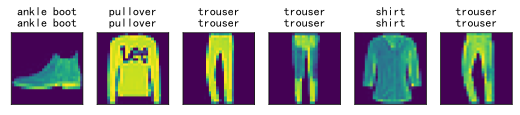

In [28]:
d2l.predict_ch3(net, test_iter)